# Organizing Playlists in 3D space
This notebook goes through a few different approaches to organize similar music genres playlists in a three-dimensional space.

#### Choice of Features
We need to find vectors for our genre playlists. 
- NLP on genre names
- Musical Features from Spotify API
- Song attributes (valence, vocalness, etc)

#### Dimensionality Reduction
- PCA
- t-SNE?

## Fetching Playlists
Playlists are fetched via Spotify Web API and curated by the fantastic [thesoundofspotify](https://open.spotify.com/user/thesoundsofspotify?si=e73bccc4293c49d2) Spotify channel from everynoise.com.

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Replace with your Spotify API credentials
client_id = 'your-client-id-here'
client_secret = 'your-client-secret' # TODO: use dotenv

# Initialize the Spotify client
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Specify the username of the user whose playlists you want to retrieve
username = 'thesoundsofspotify'

# Define list to collect all playlists in
playlists = []

# Get the first batch of user's playlists
response = sp.user_playlists(username)

while response:
    playlists.extend(response['items'])
    # Check if there are more playlists to be fetched
    if response['next']:
        response = sp.next(response)
    else:
        response = None

print(f"Total Playlists: {len(playlists)}")

In [12]:
import json

# Save playlists to a JSON file
with open('playlists.json', 'w') as f:
    json.dump(playlists, f)

## Load Playlists

In [2]:
import json

# Load playlists from a JSON file
with open('playlists.json', 'r') as f:
    playlists = json.load(f)

playlists

[{'collaborative': False,
  'description': 'One song from every genre we currently track. <a href="http://everynoise.com/thesoundofeverything.html">Annotated here.</a>',
  'external_urls': {'spotify': 'https://open.spotify.com/playlist/69fEt9DN5r4JQATi52sRtq'},
  'href': 'https://api.spotify.com/v1/playlists/69fEt9DN5r4JQATi52sRtq',
  'id': '69fEt9DN5r4JQATi52sRtq',
  'images': [{'height': None,
    'url': 'https://image-cdn-ak.spotifycdn.com/image/ab67706c0000bebbc19445bebffa370a3202a21c',
    'width': None}],
  'name': 'The Sound of Everything',
  'owner': {'display_name': 'The Sounds of Spotify',
   'external_urls': {'spotify': 'https://open.spotify.com/user/thesoundsofspotify'},
   'href': 'https://api.spotify.com/v1/users/thesoundsofspotify',
   'id': 'thesoundsofspotify',
   'type': 'user',
   'uri': 'spotify:user:thesoundsofspotify'},
  'primary_color': None,
  'public': True,
  'snapshot_id': 'NjYyOSxjNzM0YTEyZjM5ZDExYjFhODEzMjJjYjJhZTIxZDljOTMwNDAyMTAw',
  'tracks': {'href': '

## Parse Genre Names

In [3]:
import re

# Extract genres from playlist names
genres = []
for playlist in playlists:
    match = re.search(r'The Sound of (\w+ ?\w*)', playlist['name'])
    if match:
        genre = match.group(1)
        genres.append(genre)

genres


['Everything',
 '2',
 '21st Century',
 '432Hz',
 '48G',
 '528Hz',
 '5th Wave',
 '8',
 '8D',
 'A Cappella',
 'A3',
 'Aarhus Indie',
 'Aberdeen Indie',
 'Abstract',
 'Abstract Beats',
 'Abstract Hip',
 'Abstract IDM',
 'Abstractro',
 'Accordion',
 'Accordion Band',
 'Accordéon',
 'Acid House',
 'Acid IDM',
 'Acid Jazz',
 'Acid Rock',
 'Acid Techno',
 'Acid Trance',
 'Acidcore',
 'Acousmatic',
 'Acoustic Blues',
 'Acoustic Chill',
 'Acoustic Cover',
 'Acoustic Guitar',
 'Acoustic OPM',
 'Acoustic Pop',
 'Acoustic Punk',
 'Acoustic Rock',
 'Action Rock',
 'ACTORS',
 'Adelaide Indie',
 'Adelaide Punk',
 'Adivasi Pop',
 'Adoración',
 'Adoración Pentecostal',
 'Adoração',
 'Adult Standards',
 'Adventista',
 'Aesthetic Rap',
 'Afghan Pop',
 'Afghan Rap',
 'Afghan Traditional',
 'African Electronic',
 'African Experimental',
 'African Gospel',
 'African Metal',
 'African Percussion',
 'African Reggae',
 'African Rock',
 'African',
 'Afrikaans',
 'Afrikaans Folk',
 'Afrikaans Gospel',
 'Afrikaan

## Clustering Attempt 1: NLP on genre names and K-Means

In [11]:
import spacy
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

nlp = spacy.load('en_core_web_md')

# Convert genre names to vectors
genre_vectors = np.array([nlp(genre).vector for genre in genres])

# Perform clustering
kmeans = KMeans(n_clusters=5)  # change this to your desired number of clusters
clusters = kmeans.fit_predict(genre_vectors)

# Print clusters
for i in range(max(clusters) + 1):
    print(f'Cluster {i + 1}:')
    for j, genre in enumerate(genres):
        if clusters[j] == i:
            print(f' - {genre}')

# Compute similarity matrix
similarity_matrix = cosine_similarity(genre_vectors)

similarity_matrix


/Users/lewe/Library/Caches/pypoetry/virtualenvs/spotify-spatial-71d993fw-py3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 1:
 - 21st Century
 - Abstract
 - Accordion
 - Acid House
 - Acid Techno
 - Acid Trance
 - Adult Standards
 - Afghan Traditional
 - African Electronic
 - African Experimental
 - African Gospel
 - African Metal
 - African Percussion
 - African
 - Afrikaans
 - Afrikaans Folk
 - Afrikaans Gospel
 - Afrikaans Gqom
 - Afro House
 - Afro Psych
 - Afrofuturism
 - Aggressive Phonk
 - AI
 - Albanian Alternative
 - Albanian Folk
 - Albanian Iso
 - Albany NY
 - Alberta Country
 - Algerian Folk
 - Alpine Yodeling
 - Alternative Americana
 - Alternative CCM
 - Alternative Country
 - Alternative Dance
 - Alternative Metal
 - Alternative Metalcore
 - Alternative Roots
 - Ambient Black
 - Ambient Country
 - Ambient Fusion
 - Ambient House
 - Ambient Industrial
 - Ambient Post
 - Ambient Techno
 - Ambient Trance
 - American Choir
 - American Classical
 - American Contemporary
 - American Early
 - American Folk
 - American Grindcore
 - American Melodeath
 - American Metalcore
 - American Modern


array([[ 9.99999821e-01, -1.15908496e-01,  7.53493384e-02, ...,
         0.00000000e+00,  2.65329592e-02,  3.79612036e-02],
       [-1.15908496e-01,  9.99999464e-01,  7.03786239e-02, ...,
         0.00000000e+00,  3.38087752e-02, -4.37710405e-05],
       [ 7.53493384e-02,  7.03786239e-02,  9.99999821e-01, ...,
         0.00000000e+00,  1.67680532e-01,  1.31704900e-02],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.65329592e-02,  3.38087752e-02,  1.67680532e-01, ...,
         0.00000000e+00,  1.00000036e+00,  2.93171704e-01],
       [ 3.79612036e-02, -4.37710405e-05,  1.31704900e-02, ...,
         0.00000000e+00,  2.93171704e-01,  1.00000012e+00]], dtype=float32)

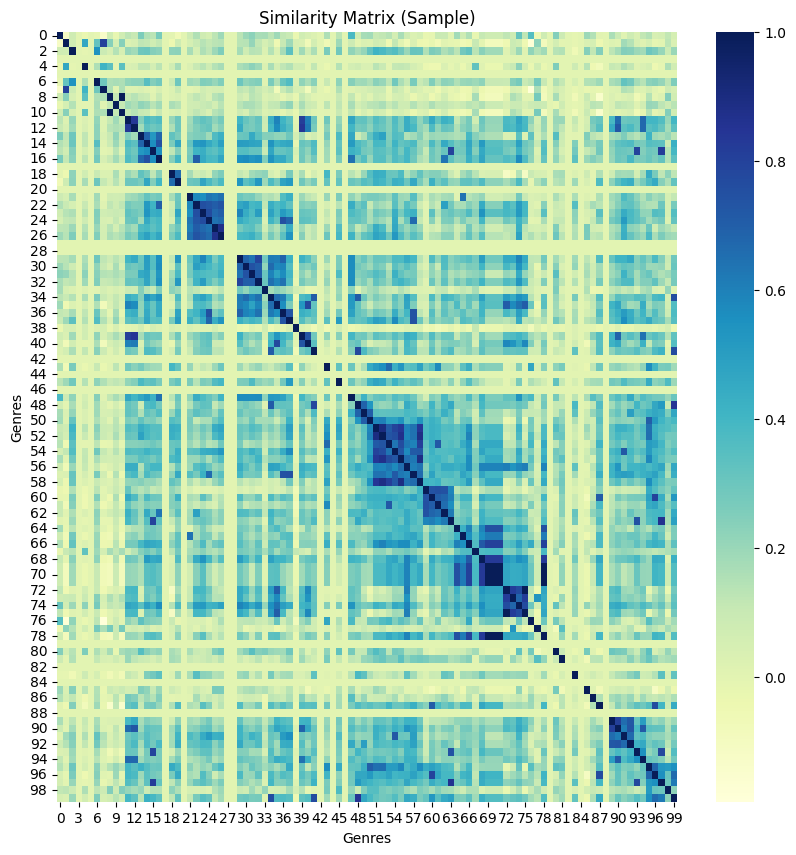

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a subset of the matrix to plot
n_samples = 100
small_matrix = similarity_matrix[:n_samples, :n_samples]

# Create a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(small_matrix, annot=False, fmt=".2f", cmap='YlGnBu')

# Add labels
plt.title('Similarity Matrix (Sample)')
plt.xlabel('Genres')
plt.ylabel('Genres')

# Show the plot
plt.show()

## PCA on Genre NLP Vectors

In [19]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # we're reducing to 3 dimensions
reduced_vectors = pca.fit_transform(genre_vectors)

# Convert the reduced vectors into a DataFrame
df = pd.DataFrame(reduced_vectors, columns=['PC1', 'PC2', 'PC3'])

# Add genre names to the DataFrame
df['Genre'] = genres

fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color='Genre', hover_name='Genre')
fig.show()


In [20]:
df

PC1        PC2        PC3             Genre
0    -6.512227 -10.719973  -2.029322        Everything
1     2.405966   5.571777  33.288010                 2
2    -7.481072   5.675165   3.674406      21st Century
3    -5.077092 -12.760570   2.374430             432Hz
4     6.651906  -4.556543  30.403671               48G
...        ...        ...        ...               ...
6337 -5.077091 -12.760573   2.374426           Électro
6338  1.294546  -2.860902  -6.456159      Örebro Indie
6339 -5.077091 -12.760573   2.374426   Ülkücü Şarkılar
6340 -7.816541  -7.296854  -2.776165      České chvály
6341 -5.740243 -11.806724  -0.520759  Śląskie Piosenki

[6342 rows x 4 columns]